In [7]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
plt.style.use('bmh')

In [8]:
df = pd.read_csv('sp500_Adj close values.csv', parse_dates = True)
df.set_index('Date', inplace=True)

In [9]:
ticker = input('> What is the ticker for the company'
               ' whose adjusted close value you want to predict for? \n>').upper()

df = df.loc[:,[f'{ticker}']]

> What is the ticker for the company whose adjusted close value you want to predict for? 
>abt


In [10]:
df

,ABT
Date,
2010-01-04,18.229385
2010-01-05,18.082108
2010-01-06,18.182526
2010-01-07,18.333153
2010-01-08,18.426876
...,...
2020-01-29,89.139999
2020-01-30,89.160004
2020-01-31,87.139999


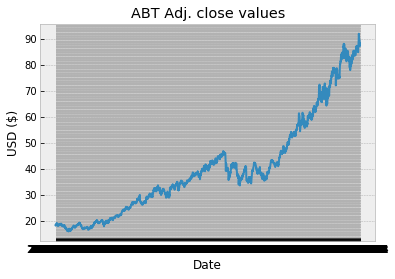

In [11]:
plt.plot(df)
plt.title(f'{ticker} Adj. close values')
plt.ylabel('USD ($)')
plt.xlabel('Date')
plt.show()

In [12]:
data = df.values

array([[18.22938538],
       [18.08210754],
       [18.18252563],
       ...,
       [87.13999939],
       [87.05999756],
       [88.23000336]])

In [24]:
import math
train_len = math.ceil(len(data)* 0.8)

In [53]:
train_len

2032

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.03114534],
       [0.02920742],
       [0.03052875],
       ...,
       [0.93789275],
       [0.93684006],
       [0.95223536]])

In [27]:
train_data = scaled_data[0:train_len,:]

In [32]:
x_train = []

y_train = []

In [33]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print(x_train)
        print(y_train)

[array([0.03114534, 0.02920742, 0.03052875, 0.03251075, 0.03374399,
       0.03497723, 0.03427252, 0.03853746, 0.03880578, 0.03943186,
       0.04260707, 0.04278591, 0.03974487, 0.03504923, 0.03589896,
       0.03491509, 0.03232129, 0.03254496, 0.02802809, 0.02981696,
       0.03473627, 0.03567529, 0.03196357, 0.0326344 , 0.02986171,
       0.02986171, 0.02945914, 0.03071143, 0.03245548, 0.0354071 ,
       0.0361225 , 0.03710635, 0.03446785, 0.03455745, 0.0326344 ,
       0.03424423, 0.03330516, 0.03402064, 0.03406529, 0.03536235,
       0.03312626, 0.03312626, 0.03419958, 0.03464682, 0.03634617,
       0.03737474, 0.03965545, 0.03509396, 0.03634617, 0.03580954,
       0.03500449, 0.03173998, 0.03035357, 0.03218714, 0.03428898,
       0.03218714, 0.03062194, 0.02784929, 0.02883321, 0.02610509])]
[0.026865444640616187]


In [34]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1972, 60, 1)

In [39]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [40]:
model.compile(optimizer='adam', loss = 'mse')

In [42]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1972/1972 [==============================] - 321s 163ms/sample - loss: 4.5407e-04


In [44]:
test_data = scaled_data[train_len - 60:, :]
x_test = []
y_test = data[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])
    

In [45]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

In [59]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.1397611328365764

In [70]:
data = df

In [71]:
train = data[:train_len]
valid = data[train_len:]

In [72]:
data

,ABT
Date,
2010-01-04,18.229385
2010-01-05,18.082108
2010-01-06,18.182526
2010-01-07,18.333153
2010-01-08,18.426876
...,...
2020-01-29,89.139999
2020-01-30,89.160004
2020-01-31,87.139999


In [79]:
print(len(predictions))
print(len(train))
print(len(valid))

507
2032
507


In [ ]:
valid['Predictions'] = predictions

In [81]:
valid

,ABT,Predictions
Date,,
2018-01-30,60.348026,61.314499
2018-01-31,60.077408,61.718506
2018-02-01,60.096741,61.922531
2018-02-02,59.623154,62.012592
2018-02-05,56.762325,61.970661
...,...,...
2020-01-29,89.139999,92.765610
2020-01-30,89.160004,92.679794
2020-01-31,87.139999,92.556519


In [82]:
train

,ABT
Date,
2010-01-04,18.229385
2010-01-05,18.082108
2010-01-06,18.182526
2010-01-07,18.333153
2010-01-08,18.426876
...,...
2018-01-23,57.245575
2018-01-24,59.652153
2018-01-25,61.101894


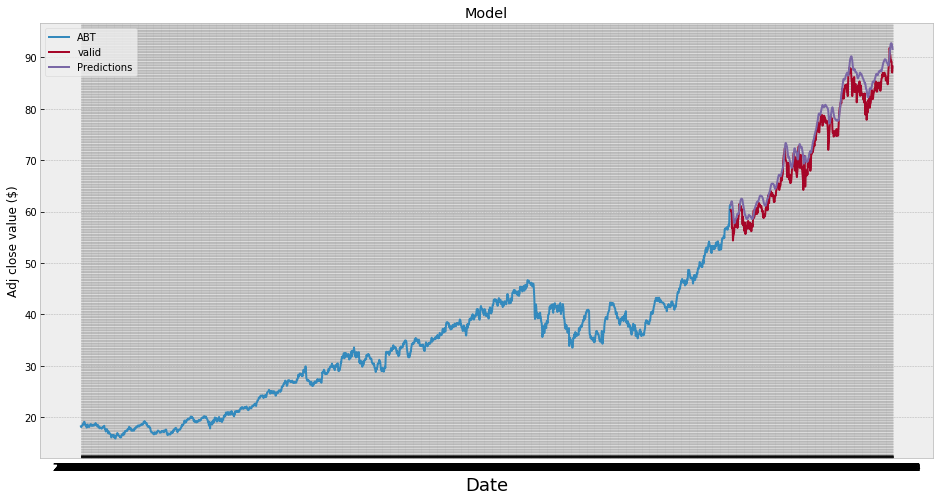

In [106]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj close value ($)')
plt.plot(train, label= ticker)
plt.plot(valid[[f'{ticker}']], label='valid')
plt.plot(valid[[f'Predictions']], label='Predictions')
plt.legend()
plt.show()
